# Heart Disease Prediction - EDA and Model Selection

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, f1_score

## 1. Data Loading and Initial Exploration

In [4]:
# Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
            "age",
            "sex",
            "cp",
            "trestbps",
            "chol",
            "fbs",
            "restecg",
            "thalach",
            "exang",
            "oldpeak",
            "slope",
            "ca",
            "thal",
            "target",
        ]
df = pd.read_csv(url, names=column_names, na_values="?")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFeature Information:")
df.info()

Dataset Shape: (303, 14)

Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


## 2. Exploratory Data Analysis

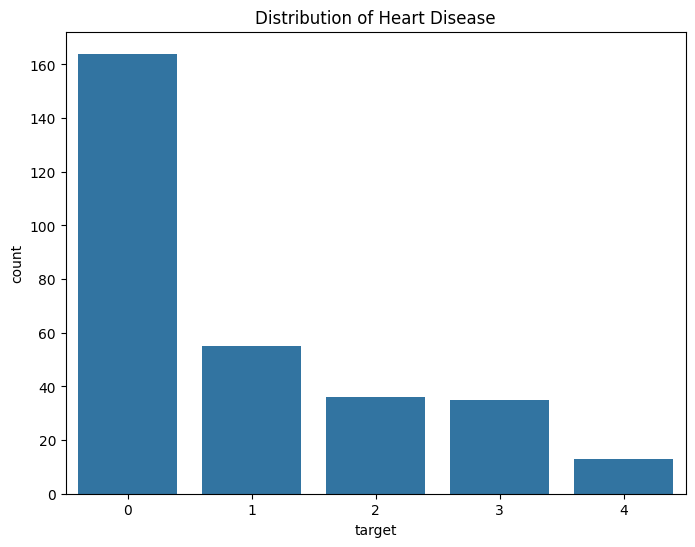

In [6]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title('Distribution of Heart Disease')
plt.show()

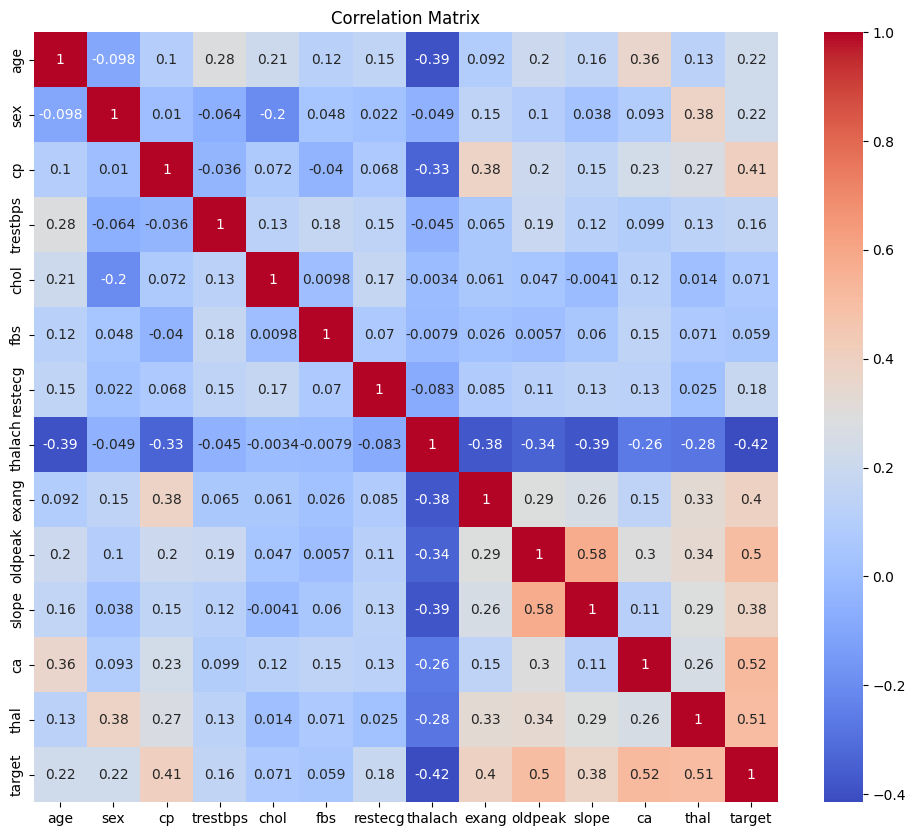

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3. Feature Engineering and Preprocessing

In [15]:
#Handle Missing values
df = df.dropna()
print(f"Shape after dropping NA: {df.shape}")

# Separate features and target
X = df.drop("target", axis=1)
y = (df["target"] > 0).astype(int)  # Convert to binary

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Shape after dropping NA: (297, 14)


## 4. Model Selection and Evaluation

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [30]:
# Try different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=3, random_state=1)
}

# Iterate through models and calculate F1 score
for name, model in models.items():
    f1_scorer = make_scorer(f1_score, average='weighted')  # Adjust `average` as needed (e.g., 'macro', 'micro')
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=f1_scorer)
    print(f"{name} CV F1 Score: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

Logistic Regression CV F1 Score: 0.822 (+/- 0.089)
Random Forest CV F1 Score: 0.830 (+/- 0.072)


In [27]:
# Train final model
final_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate final model
y_pred = final_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()